## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
df=pd.merge(mouse_metadata,study_results, how="left",on='Mouse ID')
# Display the data table for preview
df.head(25)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:

# Checking the number of mice.
len(df["Mouse ID"].unique())


249

In [3]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_ids)
    

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = df.loc[df['Mouse ID']== duplicate_mouse_ids[0]]
duplicate_mouse = pd.DataFrame(duplicate_mouse_data)
duplicate_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data_complete = df[df['Mouse ID'].isin(duplicate_mouse_ids)==False]
                               
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.

len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = clean_study_data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_study_data_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var = clean_study_data_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard = clean_study_data_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_study_data_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

newtable = pd.DataFrame(mean)
newtable2 = newtable.rename(columns={"Tumor Volume (mm3)": "Tumor_Vol_Mean"})

newtable2["Tumor_Vol_Median"] = median
newtable2["Tumor_Vol_Var"] = var
newtable2["Tumor_Vol_Stdev"] = standard
newtable2["Tumor_Vol_Sem"] = sem

newtable2.round(3)

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_Sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_group_stats = clean_study_data_complete.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

#Display the group function
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

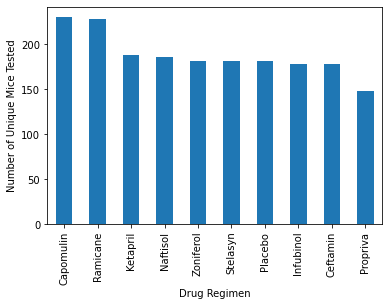

<Figure size 432x288 with 0 Axes>

In [7]:

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
counts = clean_study_data_complete['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice Tested")
plt.show()



#Save Figure
plt.savefig('Number_of_Mice_per_Regimen_pandas.png')

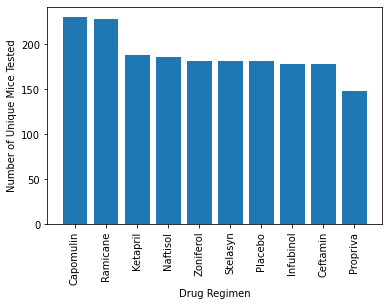

<Figure size 432x288 with 0 Axes>

In [94]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = clean_study_data_complete['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice Tested")
plt.show()



#Save Figure
plt.savefig('Number_of_Mice_per_Regimen_pyplot.png')

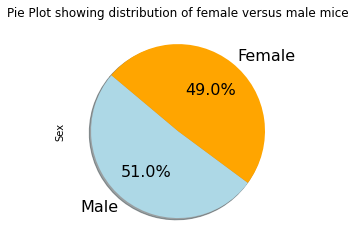

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_study_data_complete["Sex"].value_counts()
gender.plot(kind="pie",autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False,startangle=140)
plt.title("Pie Plot showing distribution of female versus male mice")
plt.savefig('PandaPieChart.png')

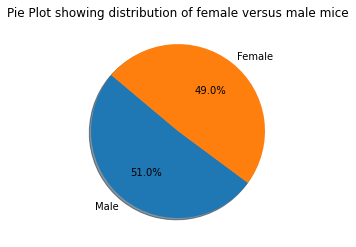

<Figure size 432x288 with 0 Axes>

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_study_data_complete["Sex"].value_counts()
plt.pie(gender.values,labels=gender.index.values,autopct="%1.1f%%", shadow=True, startangle=140)


plt.title("Pie Plot showing distribution of female versus male mice")
plt.show()



#Save Figure
plt.savefig('PyplotPieChartPie.png')

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#clean_study_data_complete.head()
# Start by getting the last (greatest) timepoint for each mouse
max_tumor=clean_study_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor=max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepointdf=pd.merge(max_tumor,clean_study_data_complete, how="left",on=['Timepoint','Mouse ID'])
last_timepointdf.head(25)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Certamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty_tumor_list=[] 
for treatment in treatment_list:
    filtered_df = df.loc[df["Drug Regimen"]==treatment,'Tumor Volume (mm3)']
    empty_tumor_list.append(filtered_df)
    quartiles = filtered_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
#Working out the outliers
    outliers=filtered_df[(filtered_df<lower_bound)|(filtered_df>upper_bound)]
    print (f"{treatment} outliers are: {outliers}")

  
  
    
    
   
    

Capomulin outliers are: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane outliers are: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Certamin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


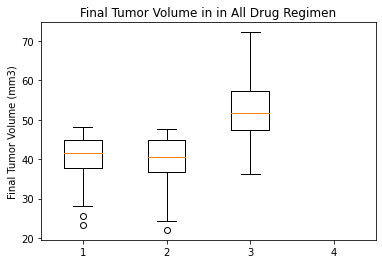

<Figure size 432x288 with 0 Axes>

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in in All Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(empty_tumor_list)
plt.show()

plt.savefig('box plot chart')

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume (mm3) by Timepoint for Mouse b128')

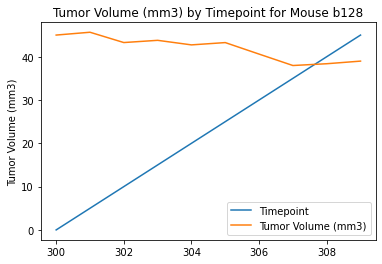

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]

#Arrange data into two columns
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Generate a line plot
capo_mouse.plot(kind="line")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) by Timepoint for Mouse b128")
ax1.set_title("Tumor Volume (mm3) by Timepoint for Mouse b128")



In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
